In [2]:
#------------------------------------------Libraries-----------------------
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [2]:
#------------------------------------------Data Import----------------------- FROM CLASS

User_id = []
Bus_id = []
Star = []
Useful = []
Funny = []
Cool = []
Text = []
I=1
with open('raw/yelp_academic_dataset_review.json', 'r',encoding='UTF-8') as f:
    for line in f:
        I += 1
        #if I==3:
           # break
        Temp_data = json.loads(line)
        User_id.append(Temp_data.get('user_id'))
        Bus_id.append(Temp_data.get('business_id'))
        Star.append(Temp_data.get('stars'))
        Useful.append(Temp_data.get('useful'))
        Cool.append(Temp_data.get('cool'))
        Funny.append(Temp_data.get('funny'))
        Text.append(Temp_data.get('text'))
        print(I)
Review_data = pd.DataFrame({
    'User_id':User_id,
    'Bus_id':Bus_id,
    'Star':Star,
    'Useful':Useful,
    'Cool':Cool,
    'Funny':Funny,
    'Review':Text
})
Review_data.to_csv('Review_Data')
#pd.read_csv('Review_Data')
#----------------------------------Loading the Users Data---------------------------------------------
User_id_list = []
User_review_count = []
Useful_count = []
Funny_count = []
Cool_count = []
elite = []
Fans_count = []
Average_Star = []
I = 1
with open('raw/yelp_academic_dataset_user.json', 'r',encoding='UTF-8') as f:
    for line in f:
        I += 1
        print(I)
        #if I==3:
            #break
        Temp_data = json.loads(line)
        User_id_list.append(Temp_data.get("user_id"))
        User_review_count.append(Temp_data.get("review_count"))
        Useful_count.append(Temp_data.get('useful'))
        Funny_count.append(Temp_data.get('funny'))
        Cool_count.append(Temp_data.get('cool'))
        elite.append(Temp_data.get('elite'))
        Fans_count.append(Temp_data.get('fans'))
        Average_Star.append(Temp_data.get('average_stars'))

       # if I == 10:
            #break
User_Data = pd.DataFrame({'User_id':User_id_list,
              'User_Review_count':User_review_count,
              'User_Useful_count':Useful_count,
              'User_Funny_count':Funny_count,
              'User_Cool_count':Cool_count,
              'Elite':elite,
              'User_Fans':Fans_count,
              'Users_Ave_Star':Average_Star})
User_Data.to_csv('User_data') # save data as csv

#--------------------------------Business dataset-------------
I = 1
Bus_id = []
State = []
City = []
Star = []
with open('raw/yelp_academic_dataset_business.json', 'r',encoding='UTF-8') as f:
    for line in f:
        Temp_data = json.loads(line)
        Bus_id.append(Temp_data.get("business_id"))
        State.append(Temp_data.get("state"))
        City.append(Temp_data.get('city'))
        #ACC.append(Temp_data.get('attributes').get('BusinessAcceptsCreditCards'))
        Star.append(Temp_data.get('stars'))

Business_Data = pd.DataFrame({'Bus_id':Bus_id,
              'State':State,
              'City':City,
              'Bus_Ave_Star':Star})
Business_Data.to_csv('Busi_data') # save data as csv

#---------------------To CSV---------------------------
Review = pd.read_csv('Review_data')
User = pd.read_csv('User_data')
Business = pd.read_csv('Busi_data')
User_subset = User[User['User_Review_count']>150].iloc[:,1::]
Business_list_CA = Business[Business['State'] == 'CA' ].iloc[:,1::]
Review_Usersub_CA = Review[(Review['User_id'].isin(User_subset['User_id'])) & Review['Bus_id'].isin(Business_list_CA['Bus_id'])]
Review_Final = Review_Usersub_CA.iloc[:,1::]
DF_RB = Review_Final.merge(Business_list_CA, how='left', on='Bus_id')
DF_Final = DF_RB.merge(User_subset, how='left', on='User_id')
DF_Final.to_csv('Data_Final')

In [6]:
DF_Final = pd.read_csv('subset.csv')
DF_Final = DF_Final.drop(columns=['Unnamed: 0', 'X'], axis=1)
DF_Final

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,meanS,sdS
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,3.950000,0.887041
1,nuEtJcnjhS1LLzinPch8xw,-ujBP1Dw0j1-Ffaz97-LXQ,5,0,0,0,Reviewing the food.\nHard to justify $16 for a...,CA,Santa Barbara,4.0,387,260,92,115,"2017,2018,2019,20,20,2021",32,4.08,4.333333,0.577350
2,TwjiWvK0ZP15lzGC049oIQ,B91yBSPvAz5O_t9JFafN1Q,3,1,0,0,A laid back bar for the college crowd. Cheap d...,CA,Santa Barbara,2.5,2604,4329,1730,2846,"2017,2018,2019,20,20,2021",183,4.11,4.000000,0.816497
3,5Hw5vLutrGrufszNc01Orw,-kY_HDP7IMvGl-kBIZVU4A,4,7,8,5,"I tried their decaf latte which was tasty, foa...",CA,Santa Barbara,4.0,299,2954,2399,2660,"2016,2017,2018,2019,20,20,2021",67,4.52,4.666667,0.577350
4,Et0qEP5K0oTCpAZ0aULmpw,18eWJFJbXyR9j_5xfcRLYA,3,0,0,0,"Mild was far too spicy. The staff was nice, bu...",CA,Carpinteria,4.5,1506,564,341,292,"2019,20,20,2021",17,4.39,4.294118,0.685994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,37ztQXVgezRc6qnYGp--hg,GuzbBFraIq-fbkjfvaTRvg,2,5,2,2,"VEGAN EATERS HERE.....To be honest, the tag mi...",CA,Santa Barbara,4.5,198,751,250,387,"2014,2015,2016,2017,2018,2019,20,20,2021",41,4.28,4.500000,0.722315
11817,vi1Y6AVgN2RWqnDCuGQxHg,A-_GjL5P2ry5OD6WgjhDPA,4,1,0,0,So much fun to sit and spend a leisurely weeke...,CA,Goleta,4.5,1039,1924,790,1171,"2013,2014,2015,2016,2017,2018,2019,20,20,2021",75,3.89,4.800000,0.447214
11818,69qAxnG2ARbolXNHphbhyQ,bVaRZDHkWdsHuARGxxpREw,4,0,0,0,I want to say that I had better logic for choo...,CA,Santa Barbara,4.5,431,375,136,260,"2018,2019,20,20,2021",15,4.54,4.681818,0.567900
11819,zpWizDgUk4-rQJXdjiBY1w,HrnSaz2f1WUEoAQQ6iD6gw,2,1,0,0,Pros:\n- Location ~2 miles from to several dow...,CA,Santa Barbara,2.5,791,1583,536,671,"2011,2012,2013,2014,2015,2016,2017,2018,2019,2...",58,3.70,3.750000,1.258306


In [4]:
#------------------------------------------Use TF-IDF to choose dictionary-----------------------
documents = []
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

X = DF_Final.Review
stemmer = WordNetLemmatizer()

for i in range(0, len(X)):
    # Remove all the special characters, like parathesis
    document = re.sub(r'\W', ' ', str(X[i]))
    # remove all single characters: like a, b, c, d
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the startf
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    # Converting to Lowercase
    document = document.lower()
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=0.1, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()


In [4]:
#------------------------------------Negative Sentiment Lexicon-----------------------------------------
f_n = open("negative-words.txt", "r")
Negative_words = f_n.readlines()

NEG = [i.rstrip('\n') for i in Negative_words]


vectorizer = CountVectorizer(vocabulary=np.unique(NEG))
X = vectorizer.fit_transform(documents).toarray()

neg = pd.DataFrame(X)
neg.columns = NEG
neg.to_csv('neg_sentiment.csv')

In [5]:
#------------------------------------Positive Sentiment Lexicon-----------------------------------------
f_p = open("positive-words.txt", "r")
Positive_words = f_p.readlines()

POS = [i.rstrip('\n') for i in Positive_words]


vectorizer = CountVectorizer(vocabulary=np.unique(POS))
X = vectorizer.fit_transform(documents).toarray()

pos = pd.DataFrame(X)
pos.columns = POS
pos.to_csv('pos_sentiment.csv')

In [111]:
#------------------------------------Combining into one dataset-----------------------------------------
num_pos = pos.sum(axis = 1)
num_neg = neg.sum(axis = 1)
joined = pd.DataFrame({'Positive': num_pos, 'Negative': num_neg})
DF_Final = DF_Final.join(joined)
DF_Final.to_csv('data_with_sentiment.csv')

ValueError: columns overlap but no suffix specified: Index(['Positive', 'Negative'], dtype='object')

In [7]:
# Reloading DF, Changing Elite, Reviews and Renaming columns
DF_Final = pd.read_csv('data_with_sentiment.csv')
DF_Final['Elite'] = DF_Final.apply(lambda row : len(re.sub(r'[,\n\s]', '', str(row['Elite']))) / 4, axis = 1)
DF_Final = DF_Final.rename(columns = {'meanS': 'Avg_User_Star', 'sdS': 'StDev_User_Star'})
DF_Final.Review = np.array(documents)
DF_Final

,Unnamed: 0,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,...,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,Avg_User_Star,StDev_User_Star,Positive,Negative
0,0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5,0,0,0,great burger fry and salad burger have hint of...,CA,Goleta,...,1687,694,1070,7.0,51,4.20,3.950000,0.887041,4,0
1,1,nuEtJcnjhS1LLzinPch8xw,-ujBP1Dw0j1-Ffaz97-LXQ,5,0,0,0,reviewing the food hard to justify 16 for burg...,CA,Santa Barbara,...,260,92,115,5.0,32,4.08,4.333333,0.577350,5,1
2,2,TwjiWvK0ZP15lzGC049oIQ,B91yBSPvAz5O_t9JFafN1Q,3,1,0,0,a laid back bar for the college crowd cheap dr...,CA,Santa Barbara,...,4329,1730,2846,5.0,183,4.11,4.000000,0.816497,1,1
3,3,5Hw5vLutrGrufszNc01Orw,-kY_HDP7IMvGl-kBIZVU4A,4,7,8,5,i tried their decaf latte which wa tasty foamy...,CA,Santa Barbara,...,2954,2399,2660,6.0,67,4.52,4.666667,0.577350,3,0
4,4,Et0qEP5K0oTCpAZ0aULmpw,18eWJFJbXyR9j_5xfcRLYA,3,0,0,0,mild wa far too spicy the staff wa nice but th...,CA,Carpinteria,...,564,341,292,3.0,17,4.39,4.294118,0.685994,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11816,11816,37ztQXVgezRc6qnYGp--hg,GuzbBFraIq-fbkjfvaTRvg,2,5,2,2,vegan eater here to be honest the tag might be...,CA,Santa Barbara,...,751,250,387,8.0,41,4.28,4.500000,0.722315,15,14
11817,11817,vi1Y6AVgN2RWqnDCuGQxHg,A-_GjL5P2ry5OD6WgjhDPA,4,1,0,0,so much fun to sit and spend leisurely weekend...,CA,Goleta,...,1924,790,1171,9.0,75,3.89,4.800000,0.447214,2,0
11818,11818,69qAxnG2ARbolXNHphbhyQ,bVaRZDHkWdsHuARGxxpREw,4,0,0,0,i want to say that had better logic for choosi...,CA,Santa Barbara,...,375,136,260,4.0,15,4.54,4.681818,0.567900,10,0
11819,11819,zpWizDgUk4-rQJXdjiBY1w,HrnSaz2f1WUEoAQQ6iD6gw,2,1,0,0,pro location 2 mile from to several downtown a...,CA,Santa Barbara,...,1583,536,671,11.0,58,3.70,3.750000,1.258306,6,5


In [8]:
# Choosing Predictors and Scaling Data
cols = ['User_Useful_count', 'User_Cool_count', 'User_Funny_count', 'Elite', 'User_Fans', 'Avg_User_Star', 'Positive', 'Negative']
subset = DF_Final[cols]
#temp = subset['Star']
mms = StandardScaler()
mms.fit(subset)
subset_new = pd.DataFrame(mms.transform(subset))
subset_new.columns = cols
#subset_new['Star'] = temp

Source for Code below: https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

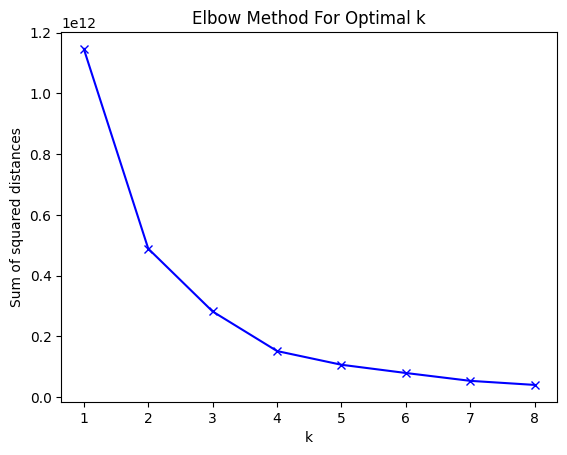

In [9]:
# Chossing ideal K
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,9)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(subset)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
# Actually fitting K Means
model = KMeans(n_clusters= 4)
model.fit(subset_new)
centroid = pd.DataFrame(model.cluster_centers_)
centroid.columns = cols
centroid['label'] = np.array([1,2,3,4])
centroid

,User_Useful_count,User_Cool_count,User_Funny_count,Elite,User_Fans,Avg_User_Star,Positive,Negative,label
0,-0.074353,-0.085103,-0.074100,0.054084,-0.032075,-0.143916,1.588789,1.661749,1
1,0.322193,0.270617,0.239237,1.314968,0.512669,0.023292,0.001465,-0.149230,2
2,-0.274839,-0.254516,-0.236462,-0.516480,-0.326973,0.014635,-0.349243,-0.305096,3
3,5.135819,5.141165,4.872078,1.150602,4.432376,0.206709,0.518479,0.344442,4


In [12]:
# Using K Means to get indicies of new groups
subset_new['labels'] = model.labels_ + 1
group_1 = list(subset_new[subset_new['labels'] == 1].index)
group_2 = list(subset_new[subset_new['labels'] == 2].index)
group_3 = list(subset_new[subset_new['labels'] == 3].index)
group_4 = list(subset_new[subset_new['labels'] == 4].index)

In [13]:
# Finding Unique Words in each Cluster

text_1 = set(" ".join(i for i in DF_Final.iloc[group_1]['Review']).split(' '))
text_2 = set(" ".join(i for i in DF_Final.iloc[group_2]['Review']).split(' '))
text_3 = set(" ".join(i for i in DF_Final.iloc[group_3]['Review']).split(' '))
text_4 = set(" ".join(i for i in DF_Final.iloc[group_4]['Review']).split(' '))

unique_1 = list(text_1 - (text_2.union(text_3).union(text_4)))
unique_2 = list(text_2 - (text_1.union(text_3).union(text_4)))
unique_3 = list(text_3 - (text_1.union(text_2).union(text_4)))
unique_4 = list(text_4 - (text_1.union(text_2).union(text_3)))

In [22]:
t_4 = " ".join(i for i in DF_Final.iloc[group_4]['Review'])
with open('group4.txt', 'w') as f:
    f.write(t_4)

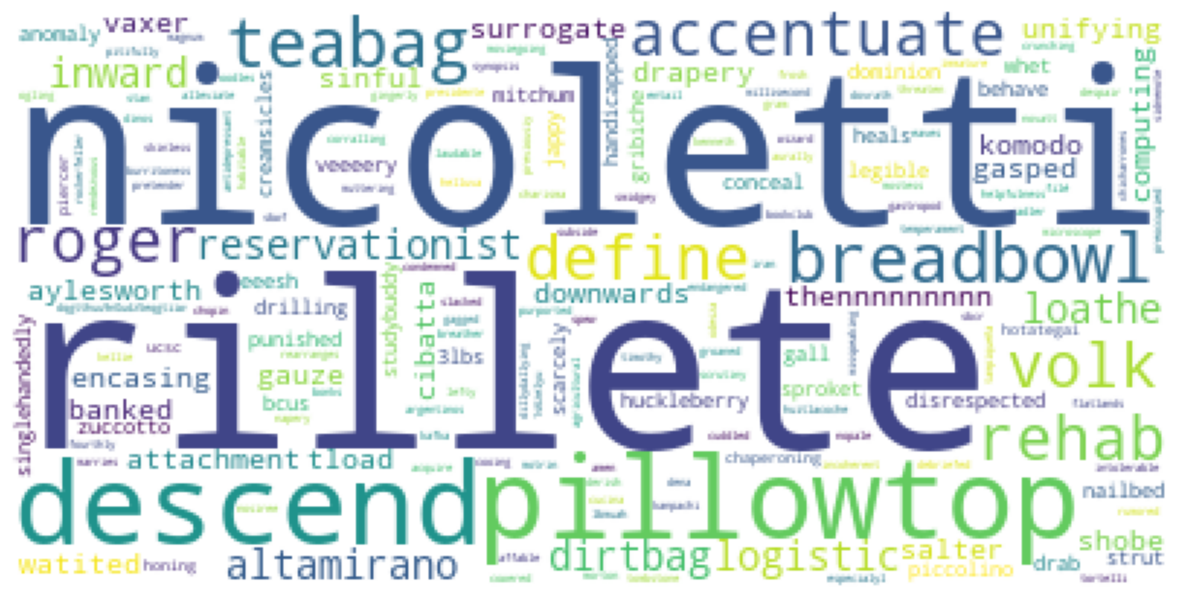

In [14]:
# Creating word cloud 1

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)
unique_1_joined = " ".join(i for i in (unique_1))
unique_1_joined = re.sub(r'\b\w{1,3}\b', '', unique_1_joined)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(unique_1_joined)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



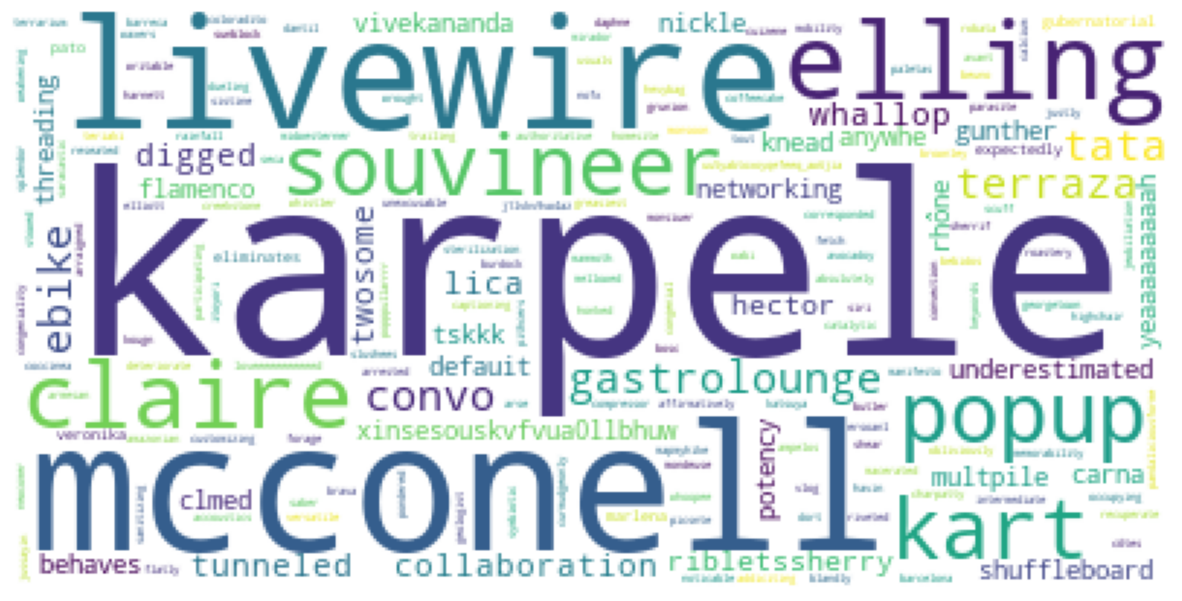

In [15]:
# Creating word cloud 2

stopwords = set(STOPWORDS)
unique_2_joined = " ".join(i for i in (unique_2))
unique_2_joined = re.sub(r'\b\w{1,3}\b', '', unique_2_joined)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(unique_2_joined)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


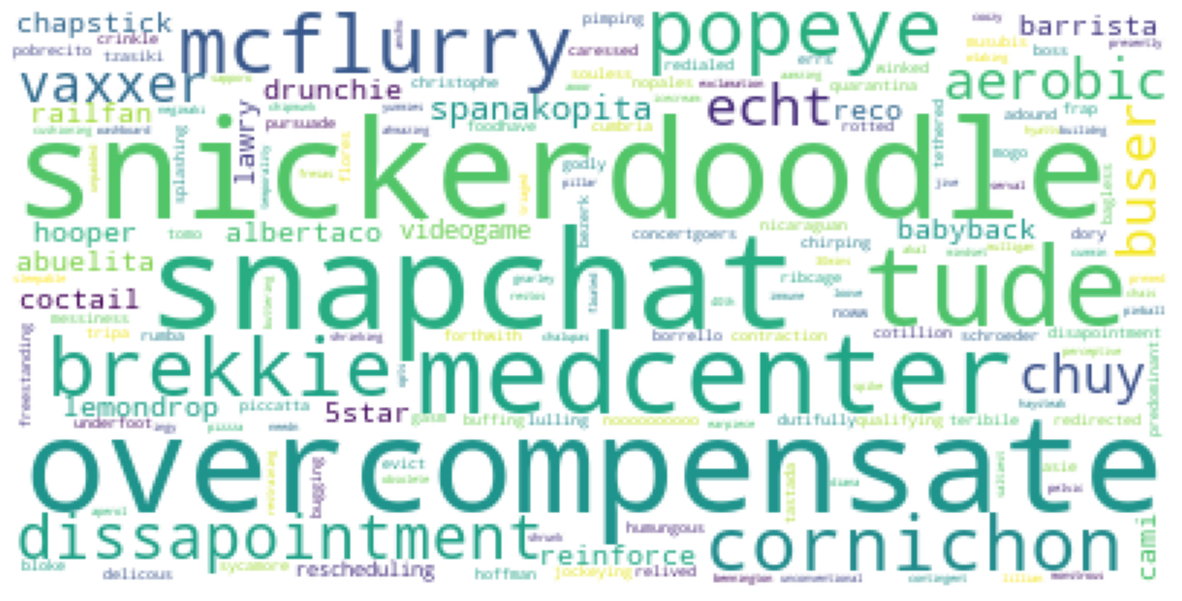

In [16]:
# Creating word cloud 3

unique_3_joined = " ".join(i for i in (unique_3))
unique_3_joined = re.sub(r'\b\w{1,3}\b', '', unique_3_joined)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(unique_3_joined)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


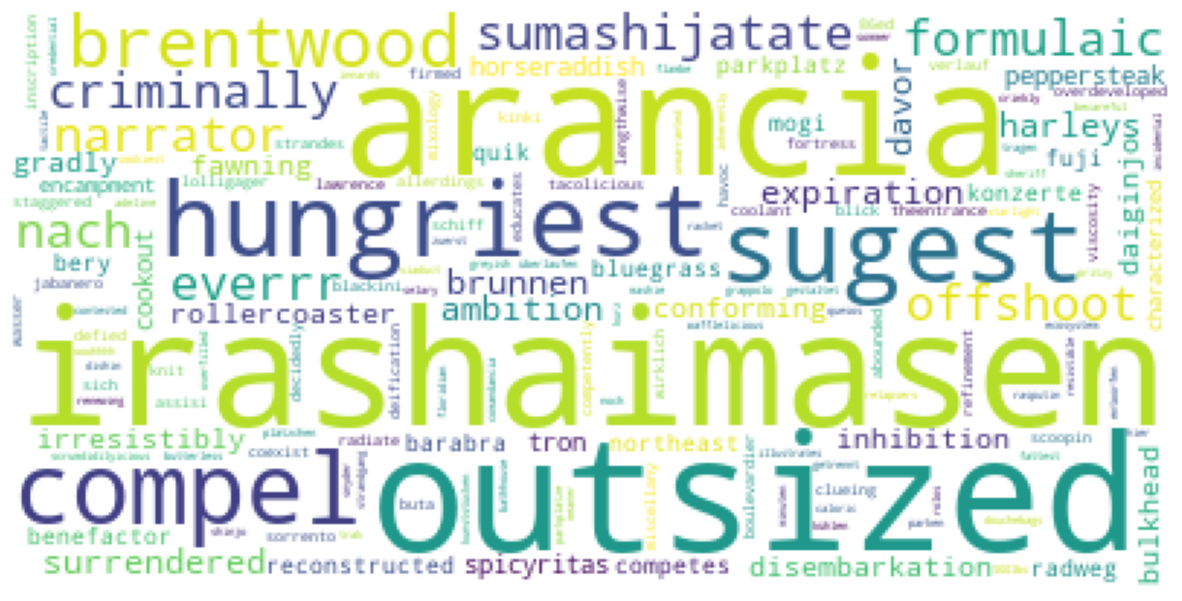

In [17]:
# Creating word cloud 4

unique_4_joined = " ".join(i for i in (unique_4))
unique_4_joined = re.sub(r'\b\w{1,3}\b', '', unique_4_joined)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(unique_4_joined)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
